### Sampling and standard error

stratified sampling
- here one samples specific proportions of individuals from various subpopulations (strata) in the larger population
- hard to get right but good if well done


numpy.std() is a function used to return the standard dev
- input is an array of elements

random.sample(population, samplesize)
- returns a list containing samples randomly chosen distinct elements of the population

In [2]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

Population mean = 16.298769461986307
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986307, 17.0685, 9.437558544803602, 10.390314372048614)

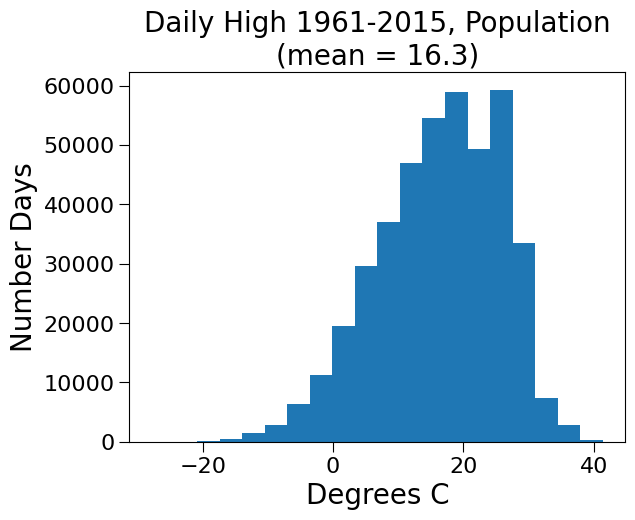

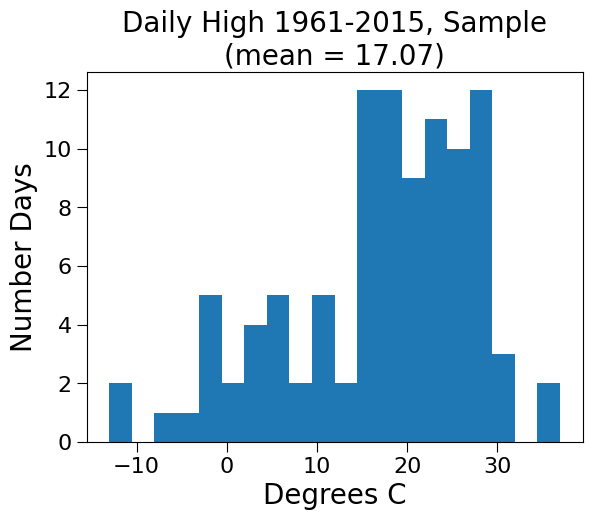

In [3]:
def makeHist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins = bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    return population

def getMeansAndSDs(population, sample, verbose = False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    if verbose:
        makeHist(population,
                 'Daily High 1961-2015, Population\n' +\
                 '(mean = '  + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C', 'Number Days')   
        print('Population mean =', popMean)
        print('Standard deviation of population =',
              numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =',
              numpy.std(sample))
    return popMean, sampleMean,\
           numpy.std(population), numpy.std(sample)

random.seed(0)         
population = getHighs()
sample = random.sample(population, 100)
getMeansAndSDs(population, sample, True)

Mean of sample Means = 16.294
Standard deviation of sample means = 0.943


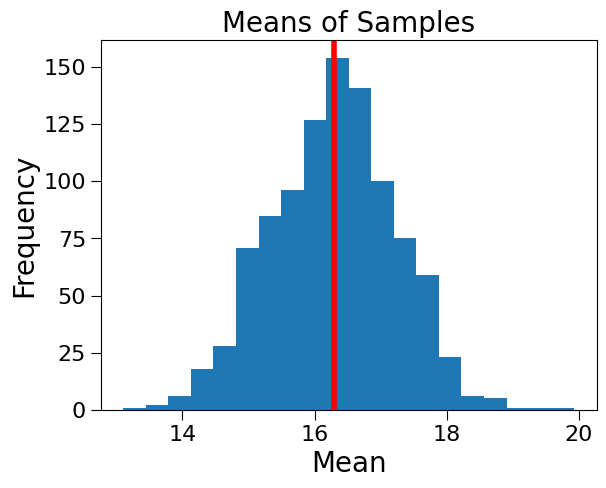

In [4]:
random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 1000
sampleMeans = []
for i in range(numSamples):
   sample = random.sample(population, sampleSize)
   popMean, sampleMean, popSD, sampleSD =\
      getMeansAndSDs(population, sample, verbose = False)
   sampleMeans.append(sampleMean)
print('Mean of sample Means =',
     round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =',
     round(numpy.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')


the 95% confidence interval is the sample mean - (z-score)*(std_dev_sample_mean)

80%	1.28
85%	1.44
90%	1.65
95%	1.96
99%	2.58

std dev of sample mean = standard dev/ sqrt(sample size)


### getting a tighter bound
how to decrease the band of the 95% confidence interval

increasing the no. of samples only causes the standard dev to increase form 0.943 to 0.946

increasing the size of each sample from 100 to 200 causes standard dev to go from 0.943 to 0.662

#### error bar
graphical representation of variability in data

way to visualise uncertainty

if the confidence interval dont overlap, the means are statistically significant
if they do overlap they might be statistically insignificant



In [ ]:
pylab.errorbar(xVals, yVals, yerr = , fmt = 'o', label = '')

#### standard error of the mean

SE = pop SD/ sqrt(sample size)


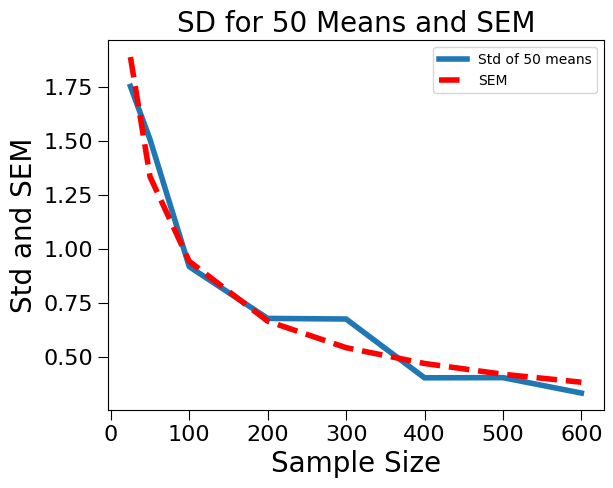

In [6]:
def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5

sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
   sems.append(sem(popSD, size))
   means = []
   for t in range(numTrials):
       sample = random.sample(population, size)
       means.append(sum(sample)/len(sample))
   sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()

standard dev is calculated by taking the different data in sample and computing their difference
- shows the variability within a sample

SE is  looking at multiple sample and calculates the variability across a population
- estimates the variability across samples of a population
- but how to calculate SE if pop SD is required
- if sample size is large enough sample SD can be used

#### looking at distributions

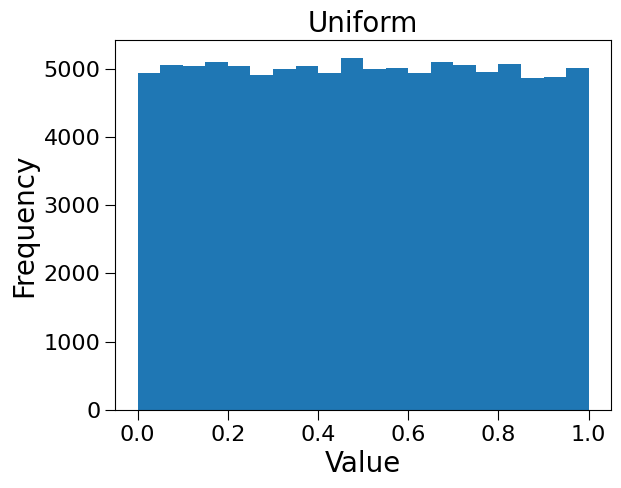

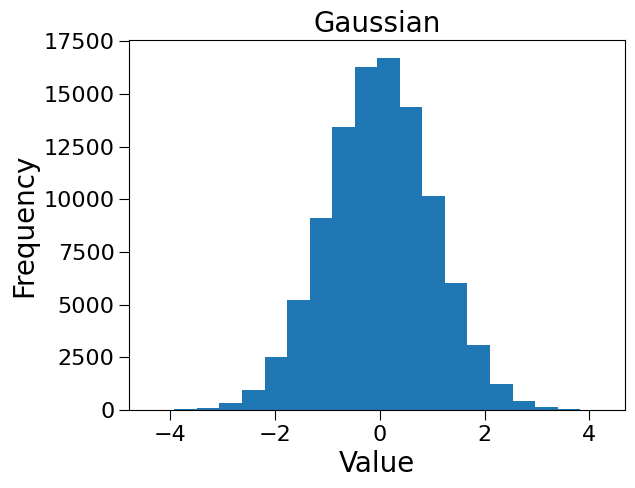

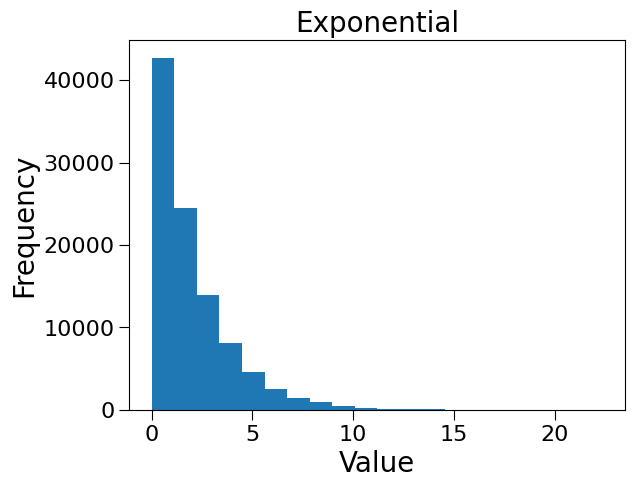

In [7]:
def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')

plotDistributions()

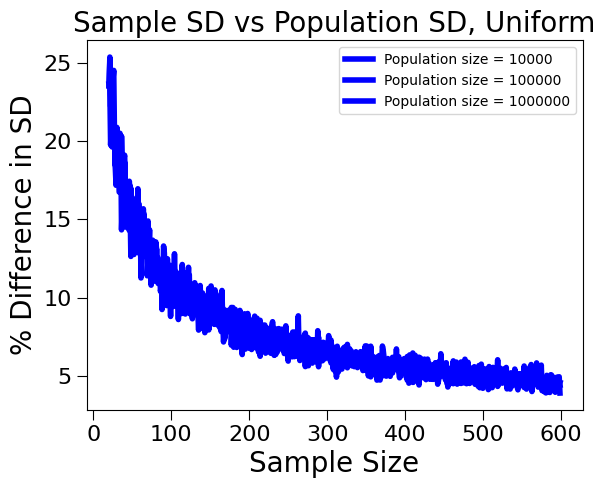

In [11]:
def compareDists():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population', 'm')
    plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population', 'b')
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population', 'r')

#compareDists()  

# popSizes = (10000, 100000, 1000000)
# sampleSizes = range(20, 600, 1)
# for size in popSizes:
#    population = []
#    for i in range(size):
#        population.append(random.expovariate(0.5))
#    ediffs = getDiffs(population, sampleSizes)
#    plotDiffs(sampleSizes, ediffs,
#              'Sample SD vs Population SD, Uniform',
#              'Population size = ' + str(size))

Size does not affect the the SD if the population is big enough

### how much data is enough
- the sample size needed is determined by the skew of the data, the larger the skew the larger the sample size
- compute the mean and std dev of sample
- use that to estimate the standard error

In [17]:
#driver for below
temps = getHighs()
popMean = sum(temps)/len(temps)
sampleSize = 200
numTrials = 10000

works well when indipendent samples are chosen 

In [18]:
# this is wrong as the first hundred or so samples are temps of phoenix and hence the data would be v skewed
random.seed(0)
numBad = 0
for t in range(numTrials):
   posStartingPts = range(0, len(temps) - sampleSize)
   start = random.choice(posStartingPts)
   sample = temps[start:start+sampleSize]
   sampleMean = sum(sample)/sampleSize
   se = numpy.std(sample)/sampleSize**0.5
   if abs(popMean - sampleMean) > 1.96*se:
       numBad += 1
print('Fraction outside 95% confidence interval =',
     numBad/numTrials)

Fraction outside 95% confidence interval = 0.8906


In [19]:
#check if the sample size is large enough, if frac outside close to 5% then correct
random.seed(0)      
numBad = 0
for t in range(numTrials):
   sample = random.sample(temps, sampleSize)
   sampleMean = sum(sample)/sampleSize
   se = numpy.std(sample)/sampleSize**0.5
   if abs(popMean - sampleMean) > 1.96*se:
       numBad += 1
print('Fraction outside 95% confidence interval =',
     numBad/numTrials)

Fraction outside 95% confidence interval = 0.0511
